In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym
import torch
import random

from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from torch.utils.data import TensorDataset
import copy
import gym_minigrid
from soccer_env import soccer

# Friend-Q

In [ ]:
env = soccer()
n_steps = 1000000
step = 0
epsilon = 0.7
gamma = 0.9
q = np.zeros((8,8,2,len(env.action_space()),len(env.action_space())))
errors2 = np.empty(shape=[0, 2])
alpha = 1
alpha_decay_rate = 0.9999999
epsilon_decay_rate = 1
done = False
a_loc,b_loc,has_ball = env.reset()
for _ in range(n_steps):
    step+=1
    if(step%1000 == 0):print('step:', step)
    #loop for each step 
    if(done): 
        a_loc,b_loc,has_ball = env.reset()
        done = False
    rand = np.random.random()
    #Choose actions randomly 
    if  rand < epsilon:
        a_a = env.sample_action()
        a_b = env.sample_action()
    if rand >= epsilon:
        a = q[a_loc,b_loc,has_ball]
        a_a,a_b = np.unravel_index(np.argmax(a, axis=None), a.shape)
    #a_a, a_b = np.random.choice(env.action_space(),2,replace = True)
    #env.render()
    #print('a_action',a_a)
#     if a_loc == 2 and b_loc == 1 and has_ball == 1 and a_a == 1 and a_b == 4: 
#         env.render()
    #take action a, observe R,S'
    a_loc_next, b_loc_next,has_ball_next,a_reward,b_reward,done = env.step(a_a,a_b)
    # if st is a terminal state, then V(St) should always be 0
    #update Q
    if done:
        v = 0
    else:
        v = np.max(q[a_loc_next,b_loc_next,has_ball_next,:,:])
    q_update = alpha*((1-gamma)*(a_reward)+gamma*v)
    new_q = (1-alpha)*q[a_loc,b_loc,has_ball,a_a,a_b]+q_update
    #document error when in state s and A taking action S and b sticking
    if a_loc == 2 and b_loc == 1 and has_ball == 1 and a_a == 1 and a_b == 4: 
        error = abs(new_q-q[2,1,1,1,4])
        errors2 = np.append(errors2,np.array([[step-1,error]]),axis=0)
    q[a_loc,b_loc,has_ball,a_a,a_b] = new_q
    #update states
    a_loc = a_loc_next
    b_loc = b_loc_next
    has_ball = has_ball_next
    #epsilon decay
    epsilon = epsilon*epsilon_decay_rate
    alpha = alpha*alpha_decay_rate

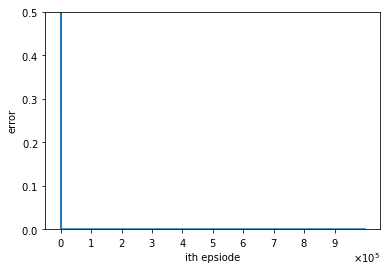

In [213]:
#plot the errors
plt.plot(errors2[:,0],errors2[:,1])
plt.ylabel('error')
plt.xlabel('ith epsiode')
plt.ylim(0,0.5)
plt.xticks(np.arange(0, 1000000, step=100000))
#plt.xticks(np.arange(min(errors2[:,0]), max(errors2[:,0])+1, 100000))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.gca().ticklabel_format(useMathText=True)
plt.show()